In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

import cv2
from opencv_camera import bgr2gray
from helpers import SaveVideo

from matplotlib import pyplot as plt
from ipywidgets import Video

In [3]:
vs = SaveVideo()
# vs.write_list(frames, "flow.mp4")
# Video.from_file("flow.mp4")

cap = cv2.VideoCapture("../carpet-small.mp4")
imsize = None
imgs = []
while True:
    ok, frame = cap.read()
    if not ok:
        break
    if imsize is None:
        imsize = frame.shape
        ir,ic,_ = imsize
        ir = ir//2
        ic = ic//2
        w = 100
    frame = bgr2gray(frame)
    # frame = frame[200:500,100:300]
    frame = frame[ir-w:ir+w,ic-w:ic+w]
    imgs.append(frame)

print(f">> image size: {imsize}")

vs.write_list(imgs, "carpet-crop.mp4")
Video.from_file("carpet-crop.mp4")

>> image size: (640, 360, 3)
>> Saving 812 200x200 images to carpet-crop.mp4
>> using avc1 on darwin
>> wrote 1.4 MB


[h264_videotoolbox @ 0x7fcd9631ea00] Error: cannot create compression session: -12903
[h264_videotoolbox @ 0x7fcd9631ea00] Try -allow_sw 1. The hardware encoder may be busy, or not supported.
[ERROR:0@2.409] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_ffmpeg_impl.hpp (2985) open Could not open codec h264_videotoolbox, error: Unspecified error (-542398533)
[ERROR:0@2.409] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_ffmpeg_impl.hpp (3002) open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
2022-11-20 21:51:12.604 Python[24206:25410488] AVF: AVAssetWriter status: Cannot Save


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41mp42\x00\x00\x00\x01mdat\x00\x00\x00\x00...')

In [4]:
# plt.imshow(imgs[10], cmap="gray");

In [18]:
from opticalflow1 import OpticalFlowCalculator, VideoOdometry
from tqdm import tqdm

path = []
frames = []
angle = []
delta = []

# flow = OpticalFlowCalculator(
#     draw_flow=True
# )
flow = VideoOdometry()

pos = np.array([0.,0.])
a = 0.0

for im in tqdm(imgs):
#     dvx,dvy,dimg = flow.processFrame(im)
#     scale = 4 / 100  * 1/30 # 4 cm to 100 px at 30 fps
    
#     da = -np.arctan2(dvx,dvy)
#     a += da * 1/30
    
#     R = np.array([
#         [np.cos(a), -np.sin(a)],
#         [np.sin(a), np.cos(a)]
#     ])
#     # R = np.eye(2)
    
#     pos += scale * R @ np.array([dvx,dvy])
    
    # pos += scale * np.array([dx,dy])
    t = flow.processFrame2(im)
    dimg = flow.flow_image
    # print(t)
    pos += t*1/30
    # print(t)
    # t = r@t
    # pos = t #np.array([t[0],t[2]])
    # print(t)
    # break
    
    
    path.append(pos.copy())
    frames.append(dimg)
    angle.append(a)
    delta.append(t)

path = np.array(path)
delta = np.array(delta)

# print(f">> {flow.find_features}  {np.mean(flow.avg_features)}")

  0%|                                                   | 0/812 [00:00<?, ?it/s]/Users/kevin/tmp/opencv/test/jupyter/opticalflow1.py:321: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  
  0%|                                                   | 0/812 [00:01<?, ?it/s]


IndexError: index 0 is out of bounds for axis 0 with size 0

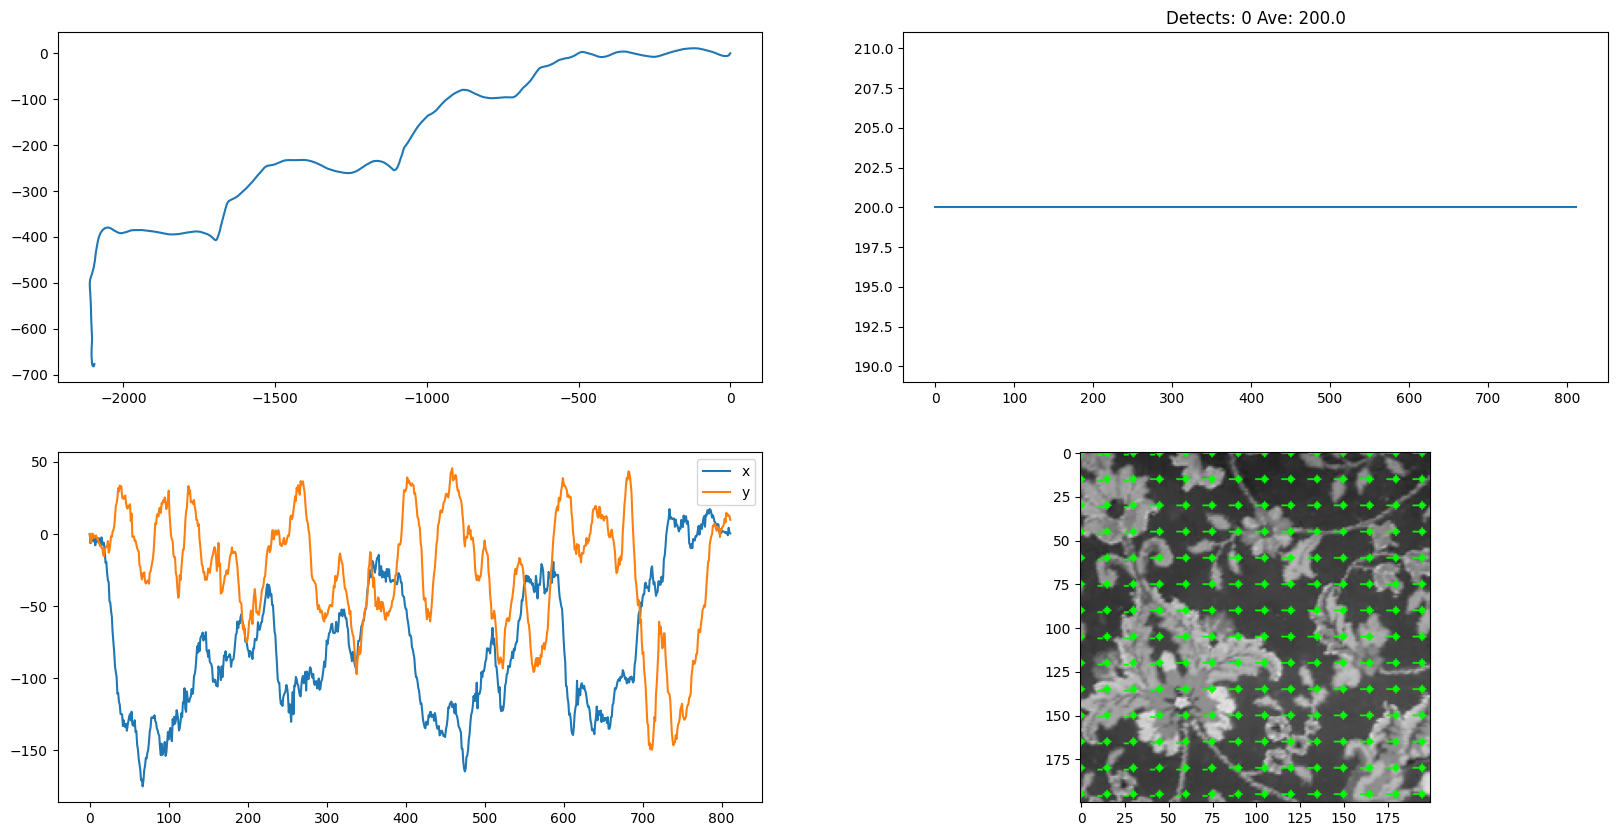

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(221); plt.plot(path[:,0],path[:,1]);
plt.subplot(222); plt.plot(flow.avg_features);plt.title(f"Detects: {flow.find_features} Ave: {np.mean(flow.avg_features)}")
plt.subplot(223); plt.plot(delta[:,0], label="x");plt.plot(delta[:,1], label="y");plt.legend();
plt.subplot(224); plt.imshow(frames[100]);

In [316]:
flow.preFeature

array([[179.278,   5.802],
       [ 13.305,   5.422],
       [  5.226,   8.983],
       ...,
       [123.349, 147.313],
       [156.311, 135.978],
       [162.84 , 135.449]], dtype=float32)

In [9]:
vs = SaveVideo()
vs.write_list(frames, "flow.mp4")
Video.from_file("flow.mp4")

>> Saving 812 200x200 images to flow.mp4
>> using avc1 on darwin
>> wrote 1.4 MB


[h264_videotoolbox @ 0x7fcd97fbe800] Error: cannot create compression session: -12903
[h264_videotoolbox @ 0x7fcd97fbe800] Try -allow_sw 1. The hardware encoder may be busy, or not supported.
[ERROR:0@162.937] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_ffmpeg_impl.hpp (2985) open Could not open codec h264_videotoolbox, error: Unspecified error (-542398533)
[ERROR:0@162.937] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_ffmpeg_impl.hpp (3002) open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
2022-11-20 21:53:53.112 Python[24206:25410488] AVF: AVAssetWriter status: Cannot Save


Video(value=b'\x00\x00\x00\x1cftypmp42\x00\x00\x00\x01isommp41mp42\x00\x00\x00\x01mdat\x00\x00\x00\x00...')

In [296]:
x = np.array([
    [0,1],
    [2,3],
    [-3,-4]
])
# np.mean(x,axis=0)
for a,b in zip(x,x):
    print(a,b)

[0 1] [0 1]
[2 3] [2 3]
[-3 -4] [-3 -4]


In [205]:
a = 0
for xx,y in x:
    d = np.arctan2(y,xx)
    a+=d
    print(a,d)
    
a / len(x)

1.5707963267948966 1.5707963267948966
2.5535900500422257 0.982793723247329
0.3392926144540449 -2.214297435588181


0.1130975381513483

In [206]:
4.3/3

1.4333333333333333

In [207]:
len(x)

3

In [208]:
x.T

array([[ 0,  2, -3],
       [ 1,  3, -4]])

In [219]:
np.mean(np.arctan2(x[:,1],x[:,0]))

0.1130975381513483

In [215]:
np.arctan2(1,0)

1.5707963267948966

In [329]:
dir(cv2.optflow)

AttributeError: module 'cv2' has no attribute 'optflow'